In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os
from helper_functions import load_data
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import spacy
nlp = spacy.load("en_core_web_lg")

def count_chars(text):
    return len(text)

def count_words(text):
    return len(text.split())

def count_capital_words(text):
    return sum(map(str.isupper, text.split()))

def count_sent(text):
    return len(nltk.sent_tokenize(text))

def count_unique_words(text):
    return len(set(text.split()))

def count_stopwords(text):
    stop_words = set(stopwords.words('english'))  
    word_tokens = word_tokenize(text)
    stopwords_x = [w for w in word_tokens if w in stop_words]
    return len(stopwords_x)

def preprocess(sent):
    sent = sent.lower() # lower case
    sent = re.sub('\s+', ' ', sent) # remove double spacing
    sent = re.sub('([0-9]+)', '', sent) # remove numbers
    sent_token_list = [word for word in sent.split(' ')]
    sent = ' '.join(sent_token_list)
    return sent

def count_direct_objects(text):
    print("Processing ...")
    doc_text = nlp(text)
    direct_object_counts = 0
    print("POS tagging and counting direct objects ...")
    for chunk in doc_text.noun_chunks:
        if chunk.root.dep_ == 'dobj':
            direct_object_counts += 1
    return(direct_object_counts)

# Load the data
text_data, labels = load_data('data')
df = pd.DataFrame(list(zip(text_data, labels)), columns=['text_data', 'label'])

# Split the data into training and test sets
train_df, test_df = train_test_split(df, test_size=0.2)

for idx, row in train_df.iterrows():
    train_df.loc[idx, 'chars'] = count_chars(row['text_data'])
    train_df.loc[idx, 'words'] = count_words(row['text_data'])
    train_df.loc[idx, 'capital_words'] = count_capital_words(row['text_data'])
    train_df.loc[idx, 'sentence_count'] = count_sent(row['text_data'])
    train_df.loc[idx, 'unique_words'] = count_unique_words(row['text_data'])
    train_df.loc[idx, 'stopwords_count'] = count_stopwords(row['text_data'])
    train_df.loc[idx, 'direct_objects_count'] = count_direct_objects(row['text_data'])

for idx, row in test_df.iterrows():
    test_df.loc[idx, 'chars'] = count_chars(row['text_data'])
    test_df.loc[idx, 'words'] = count_words(row['text_data'])
    test_df.loc[idx, 'capital_words'] = count_capital_words(row['text_data'])
    test_df.loc[idx, 'sentence_count'] = count_sent(row['text_data'])
    test_df.loc[idx, 'unique_words'] = count_unique_words(row['text_data'])
    test_df.loc[idx, 'stopwords_count'] = count_stopwords(row['text_data'])
    test_df.loc[idx, 'direct_objects_count'] = count_direct_objects(row['text_data']) 


# add engineered features with numerical indices
train_df['feat_0'] = train_df['chars'].apply(count_chars)
train_df['feat_1'] = train_df['words'].apply(count_words)
train_df['feat_2'] = train_df['capital_words'].apply(count_capital_words)
train_df['feat_3'] = train_df['sentence_count'].apply(count_sent)
train_df['feat_4'] = train_df['unique_words'].apply(count_unique_words)
train_df['feat_5'] = train_df['stopwords_count'].apply(count_stopwords)
train_df['feat_6'] = train_df['direct_objects_count'].apply(count_direct_objects)

test_df['feat_0'] = test_df['chars'].apply(count_chars)
test_df['feat_1'] = test_df['words'].apply(count_words)
test_df['feat_2'] = test_df['capital_words'].apply(count_capital_words)
test_df['feat_3'] = test_df['sentence_count'].apply(count_sent)
test_df['feat_4'] = test_df['unique_words'].apply(count_unique_words)
test_df['feat_5'] = test_df['stopwords_count'].apply(count_stopwords)
test_df['feat_6'] = test_df['direct_objects_count'].apply(count_direct_objects)

# Create a TfidfVectorizer object and fit it on the training data
vectorizer = TfidfVectorizer()
train_tf_idf = vectorizer.fit_transform(train_df['text_data']).toarray()

# Apply the same vectorizer to the test data
test_tf_idf = vectorizer.transform(test_df['text_data']).toarray()
# Combine the tf-idf features with other engineered features
engineered_features = ['feat_0', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6']
train_X = np.concatenate([train_tf_idf, train_df[engineered_features].values], axis=1)
test_X = np.concatenate([test_tf_idf, test_df[engineered_features].values], axis=1)

'''
# Combine the tf-idf features with other engineered features
train_X = np.concatenate([train_tf_idf, train_df[['chars', 'words', 'capital_words', 'sentence_count', 'unique_words', 'stopwords_count', 'direct_objects_count']].values], axis=1)
test_X = np.concatenate([test_tf_idf, test_df[['chars', 'words', 'capital_words', 'sentence_count', 'unique_words', 'stopwords_count', 'direct_objects_count']].values], axis=1)
'''

# Extract the labels for the training and test sets
train_Y = train_df['label']
test_Y = test_df['label']

# Train a random forest classifier
rf = RandomForestClassifier()
rf.fit(train_X, train_Y)

# Predict the labels for the test set
pred_Y = rf.predict(test_X)

# Print the classification report and confusion matrix
print(classification_report(test_Y, pred_Y))
print(confusion_matrix(test_Y, pred_Y))

Processing file: hemingway_bell_tolls.txt
Processing file: hemingway_sun_also.txt
Processing file: hemingway_in_our_time.txt
Processing file: hemingway_green_hills_africa.txt
Processing file: hemingway_three_stories_ten_poems.txt
Processing file: hemingway_across_the_river.txt
Processing file: hemingway_winner_take_nothing.txt
Processing file: hemingway_old_man.txt
Processing file: hemingway_farewell.txt
Processing file: hemingway_men_without_women.txt
Processing file: fitzgerald_flappers_and_philosophers.txt
Processing file: fitzgerald_tender_is.txt
Processing file: fitzgerald_bablyon_revisited.txt
Processing file: fitzgerald_gatsby.txt
Processing file: fitzgerald_beautiful_and_damned.txt
Processing file: fitzgerald_the_vegtable.txt
Processing file: fitzgerald_tales_jazz_age.txt
Processing file: fitzgerald_this_side.txt
Processing file: fitzgerald_all_the_sad.txt


KeyError: 'chars'

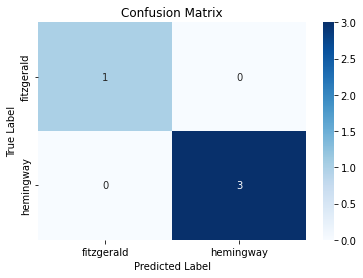

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# assume cm is the confusion matrix
cm = confusion_matrix(test_Y, pred_Y)

# create a list of class labels
classes = ['fitzgerald', 'hemingway']

# plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)

# add axis labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
importances = rf.feature_importances_

# Sort the features by their importance
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_tf_idf.shape[1]):
    print(f"{f+1}. feature {indices[f]} ({importances[indices[f]]})")

Feature ranking:
1. feature 6499 (0.02)
2. feature 4434 (0.02)
3. feature 9889 (0.02)
4. feature 28803 (0.02)
5. feature 16353 (0.02)
6. feature 29037 (0.01765625)
7. feature 24129 (0.01765625)
8. feature 26984 (0.014285714285714285)
9. feature 15121 (0.01)
10. feature 13204 (0.01)
11. feature 12290 (0.01)
12. feature 27089 (0.01)
13. feature 2580 (0.01)
14. feature 9363 (0.01)
15. feature 12603 (0.01)
16. feature 10527 (0.01)
17. feature 29251 (0.01)
18. feature 1586 (0.01)
19. feature 6921 (0.01)
20. feature 26201 (0.01)
21. feature 25321 (0.01)
22. feature 27997 (0.01)
23. feature 10004 (0.01)
24. feature 1511 (0.01)
25. feature 19757 (0.01)
26. feature 2701 (0.01)
27. feature 25070 (0.01)
28. feature 15400 (0.01)
29. feature 12568 (0.01)
30. feature 13215 (0.01)
31. feature 21134 (0.01)
32. feature 7155 (0.01)
33. feature 17202 (0.01)
34. feature 25247 (0.01)
35. feature 3934 (0.01)
36. feature 1749 (0.01)
37. feature 11722 (0.01)
38. feature 6328 (0.01)
39. feature 5007 (0.01)
40.

In [ ]:
def get_top_n_features(feature_importances, feature_names, n):
    # Create a list of tuples with feature names and importance scores
    features = list(zip(feature_names, feature_importances))

    # Sort the list by importance score in descending order
    features.sort(key=lambda x: x[1], reverse=True)

    # Return the top n features
    return features[:n]

top_features = get_top_n_features(rf.feature_importances_, vectorizer.get_feature_names(), n=25)
print(top_features)

[('by', 0.02), ('conversation', 0.02), ('expression', 0.02), ('matter', 0.02), ('whom', 0.02), ('solemn', 0.01765625), ('woods', 0.01765625), ('trying', 0.014285714285714285), ('age', 0.01), ('air', 0.01), ('almost', 0.01), ('although', 0.01), ('attracted', 0.01), ('aware', 0.01), ('been', 0.01), ('blew', 0.01), ('branches', 0.01), ('cause', 0.01), ('central', 0.01), ('certain', 0.01), ('cheap', 0.01), ('cocktail', 0.01), ('commenced', 0.01), ('considered', 0.01), ('countrymen', 0.01)]


/Users/spicy.kev/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
feature_names = vectorizer.get_feature_names()

# Create a mapping between feature indices and feature names
feature_mapping = {}
for feature_index in range(len(feature_names)):
    feature_mapping[feature_index] = feature_names[feature_index]

# Print out the feature mapping
print(feature_mapping)

{0: '00', 1: '000', 2: '02', 3: '03', 4: '10', 5: '100', 6: '1000', 7: '100678', 8: '103', 9: '105', 10: '1088', 11: '11', 12: '118', 13: '11th_', 14: '12', 15: '13', 16: '1300', 17: '1305', 18: '132', 19: '1335', 20: '137th', 21: '14', 22: '15', 23: '158th', 24: '16', 25: '17', 26: '1700', 27: '1769', 28: '1776', 29: '17th', 30: '18', 31: '1812', 32: '1831', 33: '1832', 34: '1834', 35: '1844', 36: '1846', 37: '1860', 38: '1861', 39: '1868', 40: '1870', 41: '1873', 42: '1879', 43: '1880', 44: '1881', 45: '1890', 46: '1895', 47: '1898', 48: '19', 49: '1900', 50: '1902', 51: '1905', 52: '1906', 53: '1907', 54: '1908', 55: '1909', 56: '1910', 57: '1911', 58: '1912', 59: '1913', 60: '1914', 61: '1915', 62: '1916', 63: '1917', 64: '1918', 65: '1919', 66: '1920', 67: '1921', 68: '1922', 69: '1925', 70: '1933', 71: '1934', 72: '1942', 73: '1st', 74: '1st_', 75: '20', 76: '200', 77: '201', 78: '206', 79: '20th', 80: '20th_', 81: '21', 82: '2127', 83: '2145', 84: '21st_', 85: '22', 86: '23', 87

In [ ]:
desired_features = ['chars', 'words', 'capital_words', 'sentence_count', 'unique_words', 'stopwords_count', 'direct_objects_count']
added_features_dict = {key: value for key, value in feature_mapping.items() if value in desired_features}
added_features_dict

{29056: 'words'}

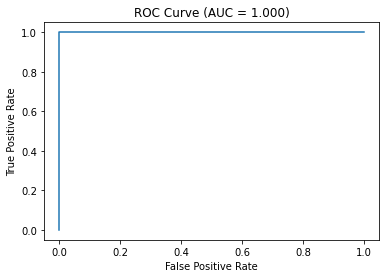

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# predict probabilities for test set
probs = rf.predict_proba(test_X)[:, 1]

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(test_Y, probs)

# calculate AUC score
auc = roc_auc_score(test_Y, probs)

# plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.3f})'.format(auc))
plt.show()